In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import json 
import pandas as pd

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
from plotting import *

In [5]:
# Task and method
task = 'binary_abuse'
method = 'weak_supervision'

path = f'../results/{task}/{method}/'

In [6]:
# Global variables
n_trains = [16, 32, 64, 128, 256, 512, 1024]
seeds = [1, 2, 3]

In [7]:
# Models
model = 'LabelModel'
models = [model]

In [8]:
dataset = prepare_dataset(models, n_trains, seeds, path)

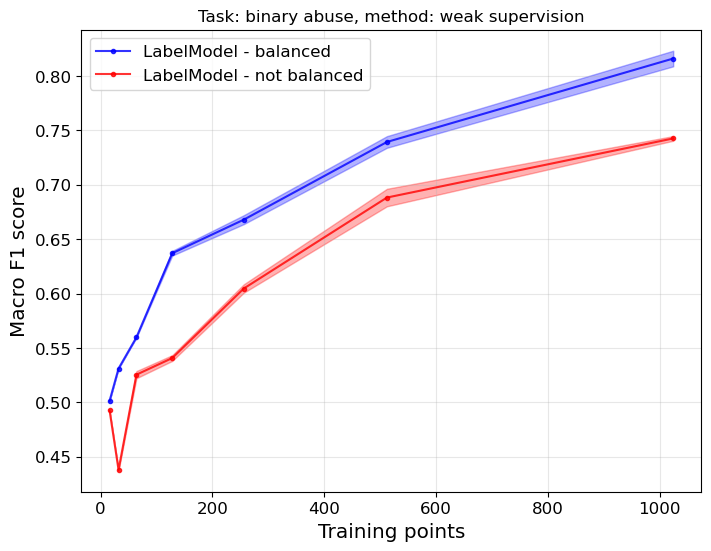

In [9]:
figsize = (8, 6)
plot_learning_curve(task, method, models, n_trains, seeds, dataset, figsize)

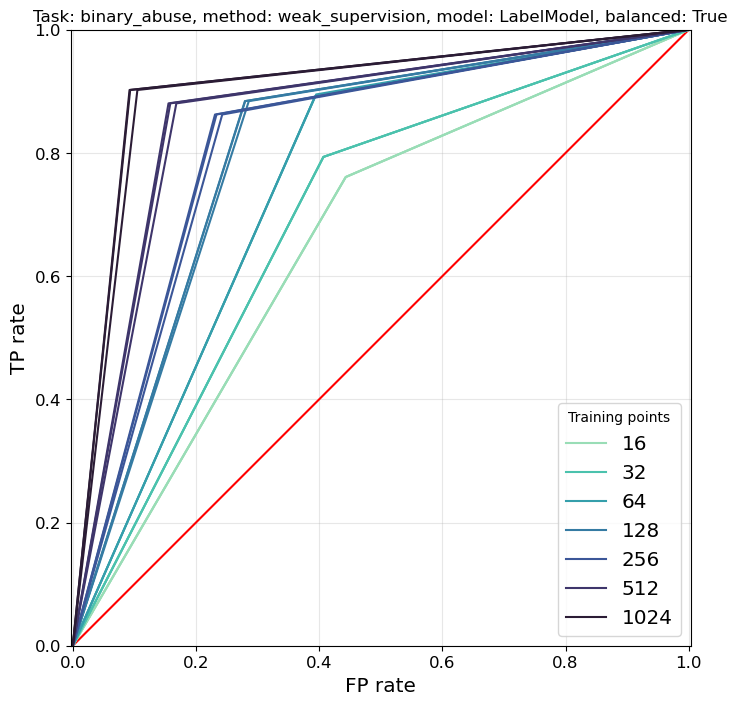

In [10]:
figsize=(8,8)
balanced=True

plot_roc_ntrains(task, method, model, n_trains, seeds, balanced, dataset, figsize)

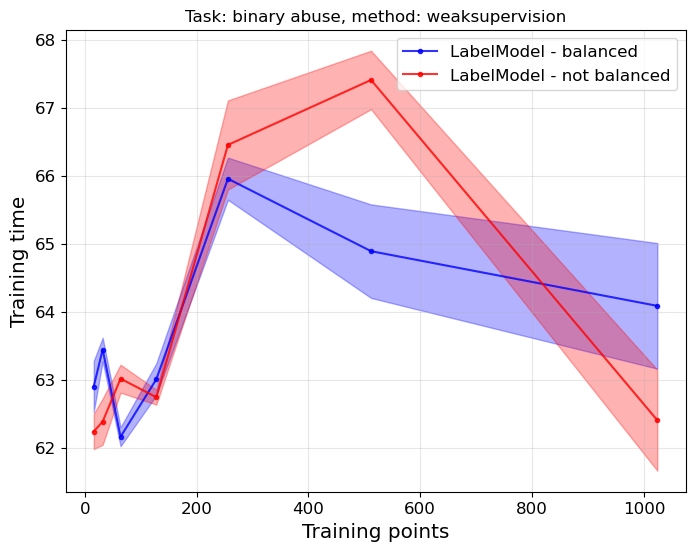

In [11]:
figsize=(8, 6)
plot_times(task, method, models, n_trains, seeds, balanced, dataset, figsize)

# Deprecated

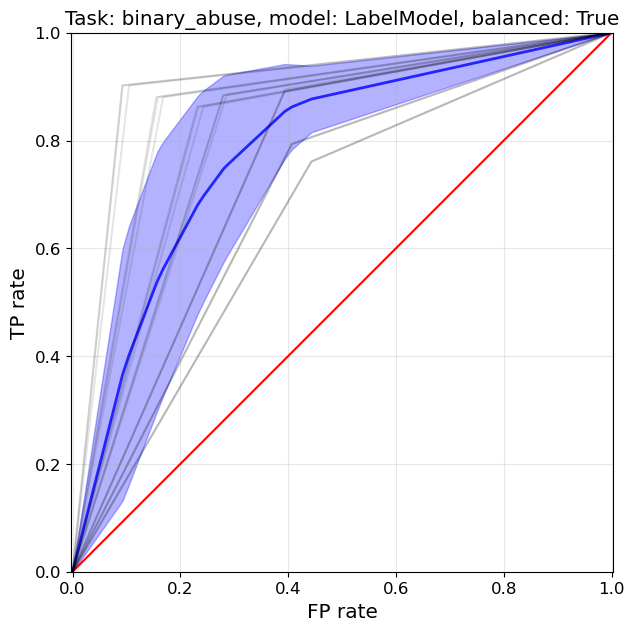

In [13]:
balanced = True
figsize = (7, 7)
alpha=0.8

plot_roc_curves(task, model, n_trains, seeds, balanced, dataset, figsize, alpha)

# Model comparison

In [2]:
## Binary abuse

In [6]:
# Task and method
task = 'binary_abuse'
methods = ['weak_supervision', 'transfer_learning', 'prompt_engineering']

# Global variables
n_trains = [16, 32, 64, 128, 256, 512, 1024]
seeds = [1, 2, 3]

# Models
model = 'distilbert'
models = [model]

# prompt used for prompt engineering
prompt = '{"placeholder":"text_a"} Does this text contain abuse? {"mask"}'

df = pd.read_csv(f'../results/{task}/results.csv')
df['model'] = df['model'].apply(lambda x: x.replace("-base-cased", ""))

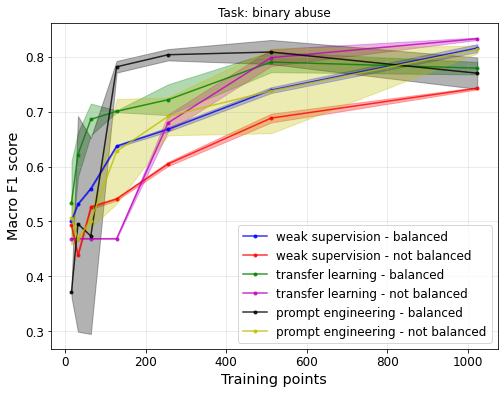

In [7]:
figsize = (8, 6)
plot_learning_curve_all(task, methods, models, n_trains, seeds, df, figsize, prompt)

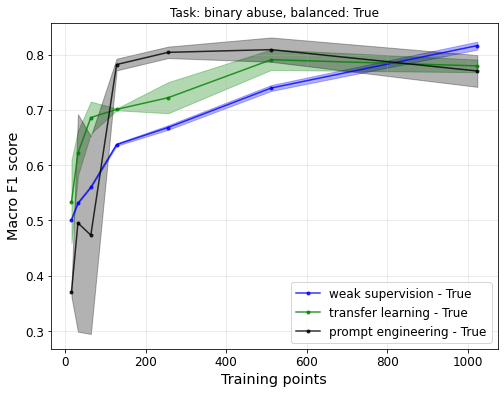

In [8]:
figsize = (8, 6)
balanced = True
plot_learning_curve_balanced(task, methods, models, n_trains, seeds, balanced, df, figsize, prompt)

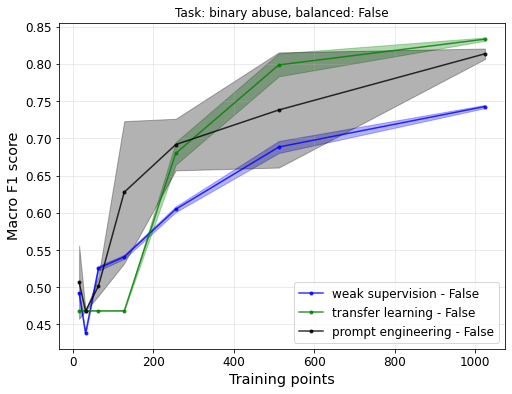

In [9]:
figsize = (8, 6)
balanced = False
plot_learning_curve_balanced(task, methods, models, n_trains, seeds, balanced, df, figsize, prompt)

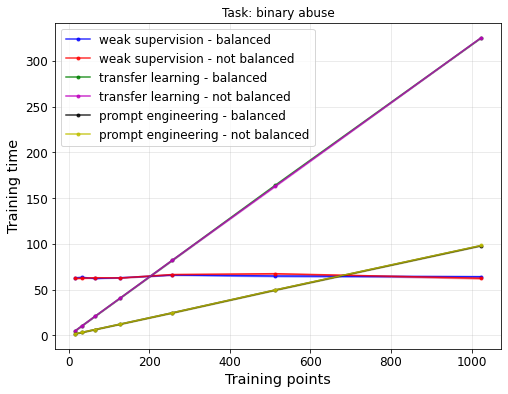

In [10]:
figsize=(8, 6)
plot_times_all(task, methods, models, n_trains, seeds, df, figsize, prompt)

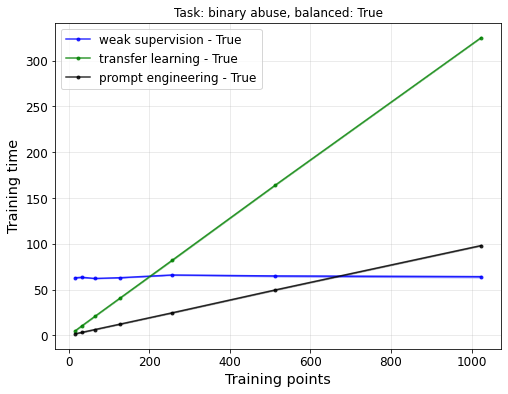

In [11]:
figsize=(8, 6)
balanced = True
plot_times_balanced(task, methods, models, n_trains, seeds, balanced, df, figsize, prompt)

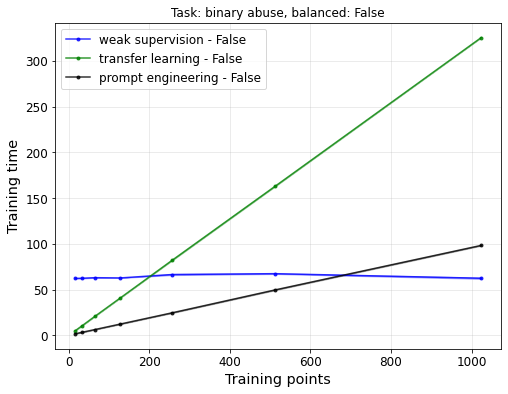

In [12]:
figsize=(8, 6)
balanced = False
plot_times_balanced(task, methods, models, n_trains, seeds, balanced, df, figsize, prompt)

## prompt comparison

In [19]:
# Task and method
task = 'binary_abuse'
method = 'prompt_engineering'#['transfer_learning', 'prompt_engineering'] #['weak_supervision', 'transfer_learning', 'prompt_engineering']

# Global variables
n_trains = [16, 32, 64, 128, 256, 512, 1024]
seeds = [1, 2, 3]

# template short names
abuse_templates_mapping_dict = {'{"placeholder":"text_a"} It was? {"mask"}': "Prompt 1", 
                              '{"placeholder":"text_a"} Does this text contain abuse? {"mask"}': "Prompt 2", 
                              '{"placeholder":"text_a"} Is this text abusive? {"mask"}': "Prompt 3", }

df = pd.read_csv(f'../results/{task}/results.csv')
df['model'] = df['model'].apply(lambda x: x.replace("-base-cased", ""))
prompts = df.dropna(subset=['template'])["template"].unique()

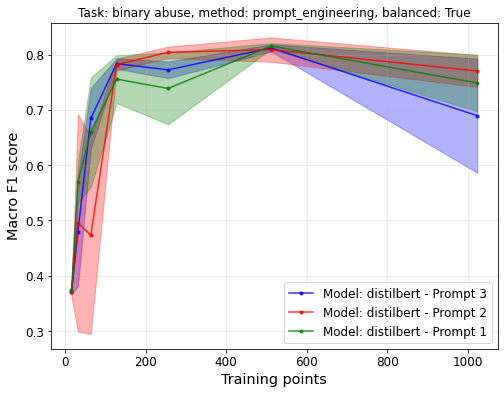

In [20]:
figsize = (8, 6)
balanced = True

# Models
models = ['distilbert']

plot_learning_curve_prompt(task, method, models, n_trains, seeds, balanced, df, figsize, prompts, abuse_templates_mapping_dict)

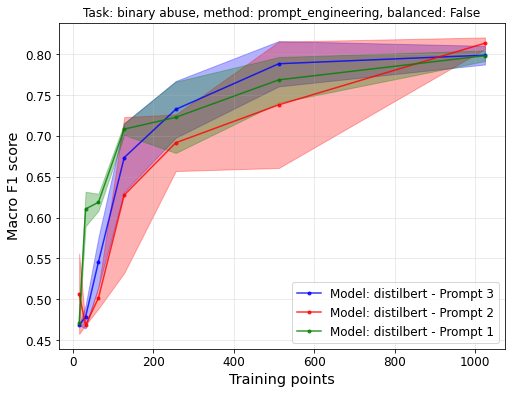

In [23]:
figsize = (8, 6)
balanced = False

# Models
models = ['distilbert']

plot_learning_curve_prompt(task, method, models, n_trains, seeds, balanced, df, figsize, prompts, abuse_templates_mapping_dict)

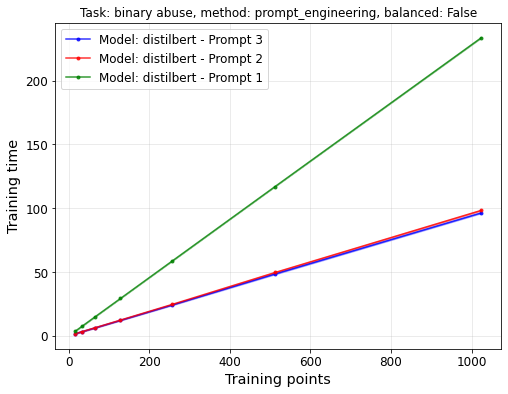

In [21]:
figsize=(8, 6)
balanced = False
plot_times_prompt(task, method, models, n_trains, seeds, balanced, df, figsize, prompts, abuse_templates_mapping_dict)

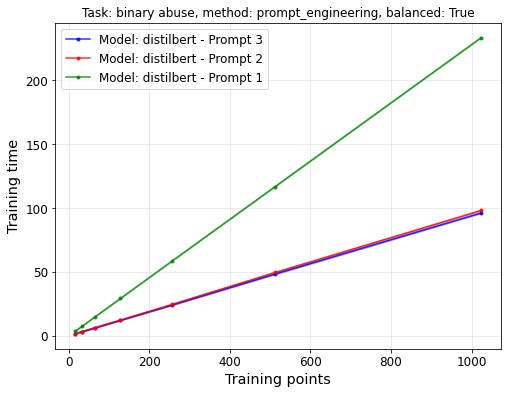

In [22]:
figsize=(8, 6)
balanced = True
plot_times_prompt(task, method, models, n_trains, seeds, balanced, df, figsize, prompts, abuse_templates_mapping_dict)

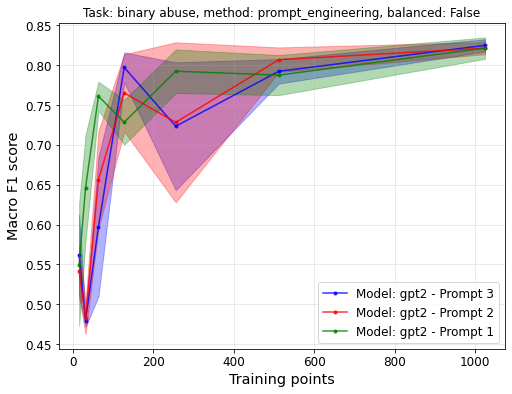

In [24]:
figsize = (8, 6)
balanced = False

# Models
models = ['gpt2']

plot_learning_curve_prompt(task, method, models, n_trains, seeds, balanced, df, figsize, prompts, abuse_templates_mapping_dict)

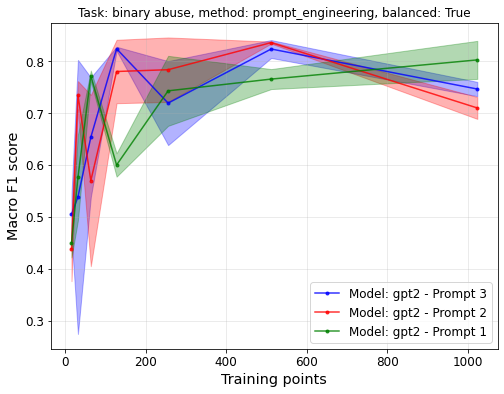

In [25]:
figsize = (8, 6)
balanced = True

# Models
models = ['gpt2']

plot_learning_curve_prompt(task, method, models, n_trains, seeds, balanced, df, figsize, prompts, abuse_templates_mapping_dict)